# Esteira de Aprendizado de Máquina - AI Developer Productivity

---

*Notebook criado como exemplo de esteira completa de Machine Learning.*

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Carregamento dos Dados

In [3]:
# Carregue o arquivo .csv fornecido pelo professor ou copiado do Kaggle
file_path = 'ai_dev_productivity.csv'  # Substitua pelo caminho correto se necessário
df = pd.read_csv(file_path)
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


## Estatísticas Descritivas Gerais

In [4]:
print('Estatísticas Descritivas:')
display(df.describe(include='all'))
print('\nInformações da Base:')
df.info()

Estatísticas Descritivas:


,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000



Informações da Base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Transformação em uma Coluna

In [5]:
# Exemplo: Codificando 'experience_level' (ajuste conforme suas colunas)
if 'experience_level' in df.columns:
    le = LabelEncoder()
    df['experience_level_encoded'] = le.fit_transform(df['experience_level'])
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


## Transformação em uma Linha

In [6]:
# Exemplo: Removendo outliers da coluna 'productivity_score' (ajuste se necessário)
if 'productivity_score' in df.columns:
    q1 = df['productivity_score'].quantile(0.25)
    q3 = df['productivity_score'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df['productivity_score'] >= lower_bound) & (df['productivity_score'] <= upper_bound)]
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


## Divisão dos Dados em Treinamento, Validação e Teste

In [15]:
# Supondo que 'productivity_score' é o alvo (ajuste se necessário)
if 'task_success' in df.columns:
    y = df['task_success']
    X = df.drop(['task_success'], axis=1)

    # Codifica todas as colunas categóricas restantes
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = LabelEncoder().fit_transform(X[col])

    # Padronização
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Divisão
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
else:
    print('A coluna alvo não foi encontrada.')

## Treinamento e Avaliação de um Modelo

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaliação
y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print(f'Acurácia no conjunto de validação: {acc_val:.2f}')

Acurácia no conjunto de validação: 0.97


## Matriz de Confusão e Acurácia

Acurácia no conjunto de validação: 0.97

Acurácia na validação: 97.00%


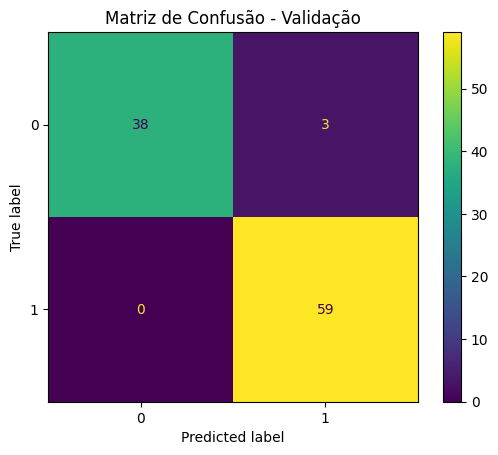

In [18]:
acc_val = accuracy_score(y_val, y_pred_val)
print(f'Acurácia no conjunto de validação: {acc_val:.2f}')
print(f"\nAcurácia na validação: {acc_val*100:.2f}%")
cm = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(cm).plot()
plt.title('Matriz de Confusão - Validação')
plt.show()

## Resultado de uma Predição no Modelo

In [25]:
# Recuperando o índice original da amostra de teste
from sklearn.model_selection import train_test_split

# Supondo que você já fez o split como no seu código, recalcule os índices:
_, X_temp, _, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
_, X_test_idx, _, y_test_idx = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostrando a linha original do DataFrame
print("\nAmostra original do conjunto de teste:")
print(df.iloc[X_test_idx.index[0]])


Amostra original do conjunto de teste:
hours_coding          2.19
coffee_intake_mg    341.00
distractions          2.00
sleep_hours           9.20
commits               3.00
bugs_reported         0.00
ai_usage_hours        0.45
cognitive_load        1.80
task_success          0.00
Name: 347, dtype: float64
